<a href="https://colab.research.google.com/github/gshave/stats/blob/main/stats_3_workingwithdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statistics
from statsmodels import robust

# Useful commands

In [ ]:
%who

np	 pd	 plt	 robust	 sns	 statistics	 stats	 


In [ ]:
%whos

Variable     Type      Data/Info
--------------------------------
np           module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd           module    <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt          module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
robust       module    <module 'statsmodels.robu<...>dels/robust/__init__.py'>
sns          module    <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
statistics   module    <module 'statistics' from<...>ython3.11/statistics.py'>
stats        module    <module 'scipy.stats' fro<...>scipy/stats/__init__.py'>


In [ ]:
del(marigne)

NameError: name 'marigne' is not defined

In [ ]:
dir(margins)

# 3.5 Descriptive statistics

New data set: summarise in a compact, easily understood fashion.



In [ ]:
afl_finalists = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv")
afl_margins = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv")

In [ ]:
afl_finalists.shape

(400, 1)

In [ ]:
afl_margins.shape

(176, 1)

## Measures of cental tendency
The first thing to calculate is a measure of central tendency.


### The mean
* Useful for interval and ratio scale.
* Uses all the information in the data (useful with small amounts of data but not suitable for ordinal data)
* Sensitive to extreme values - gets dragged towards the tail for skewed data
* Useful when looking at the overall value, but not the typical value


In [ ]:
margins = afl_margins['afl.margins']
margins.mean()

35.30113636363637

### The median
* Useful for ordinal, interval, and ratio scale.
* Only makes use of order information, not precise numbers involved.
* Not sensitive to outliers.
* Useful when looking at the typical value, but not the overall value

In [ ]:
margins.median()

30.5

### The trimmed mean
* More robust to outliers than the mean
* Uses more data than the median

0% trimmed mean = mean

50% trimmed mean = median

In [ ]:
dataset = [-15, 2, 3, 4, 5, 6, 7, 8, 9, 12]
statistics.mean(dataset)

4.1

In [ ]:
statistics.median(dataset)

5.5

In [ ]:
dataset_arr = np.array(dataset)
stats.trim_mean(dataset_arr, 0.1)

5.5

In [ ]:
margins_arr = np.array(margins)
stats.trim_mean(margins_arr, 0.05)

33.75

### The mode
* The value occurring most frequently
* Useful for nominal data
* Can be useful for ordinal, interval or ratio scale if you want the most likely exact value

In [ ]:
afl_finalists.head(n=10)

,afl.finalists
0,Hawthorn
1,Melbourne
2,Carlton
3,Melbourne
4,Hawthorn
5,Carlton
6,Melbourne
7,Carlton
8,Hawthorn
9,Melbourne


In [ ]:
finalists = afl_finalists['afl.finalists']
finalists.value_counts().max()

39

In [ ]:
statistics.mode(finalists)

'Geelong'

## Measures of variability

### The range
* Gives full spread of the data
* Not robust to outliers
* Only use when you care about the extremes in the data

In [ ]:
margins.max() - margins.min()

116

## The interquartile range
* The range spanned by the middle half of the data
* Robust to outliers
* Complements median
* Commonly used

In [ ]:
np.quantile(margins, 0.5)

30.5

In [ ]:
np.quantile(margins, [0.25, 0.75])

array([12.75, 50.5 ])

In [ ]:
stats.iqr(margins)

37.75

### The mean absolute deviation
* Report the typical absolute deviation from the mean
* Interpretable
* Less attractive than SD due to some issues

In [ ]:
np.mean(np.abs(margins - np.mean(margins)))

21.10123966942149

### Variance
* Average squared deviation from the mean
* We prefer squared deviations because of various elegant mathematical properties
* BUT they are uninterpretable in terms of the original variable


In [ ]:
sample_variance = statistics.variance(margins)
population_variance = statistics.pvariance(margins)

print(f"statistics.variance divides by N-1: {sample_variance}")
print(f"statistics.pvariance divides by N: {population_variance}")

statistics.variance divides by N-1: 679.834512987013
statistics.pvariance divides by N: 675.9718168904959


### Standard deviation
* Nice mathematical properties of variance
* Expressed in the same units as the data
* sqrt(var)
* The 68%, 95%, 99.7% rule only works if the underlying data is normally distributed. It's good enough if it's approximate.
* Very sensitive to extreme outliers
* Commonly used to complement the mean

In [ ]:
statistics.stdev(margins) # divides by N-1 rather than N


26.073636359108274

### Median absolute deviation
* The median of the absolute deviations from the median of the data.
* It attempts to describe a typical deviation from a typical value in the dataset
* When the underlying data is normally distributed, multiply MAD by 1.4826 to obtain a robust estimation of SD

In [ ]:
robust.mad(margins, c=1)

19.5

In [ ]:
robust.mad(margins) # default c=1.4826

28.91074326085924

## Skew and kurtosis

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

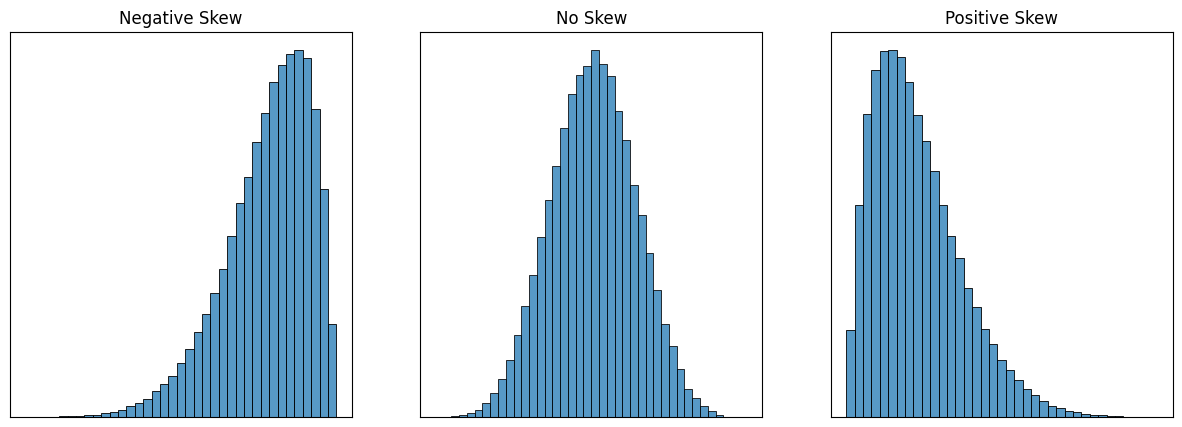

In [ ]:
url = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/skewdata.csv'

skew_pdf = pd.read_csv(url)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data=skew_pdf.loc[skew_pdf['Skew'] == 'NegSkew'], x='Values', binwidth=0.02, ax=axes[0])
ax2 = sns.histplot(data=skew_pdf.loc[skew_pdf['Skew'] == 'NoSkew'], x='Values', binwidth=0.02, ax=axes[1])
ax3 = sns.histplot(data=skew_pdf.loc[skew_pdf['Skew'] == 'PosSkew'], x='Values', binwidth=0.02, ax=axes[2])

axes[0].set_title("Negative Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Positive Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine


In [ ]:
margins.skew(axis=0, skipna=True) # normalised by N-1

0.7804075289401982

## Summary of a variable

## Describe a variable

In [ ]:
# describe behaves differently for different classes of object

# numeric object
margins.describe()

,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


In [ ]:
afl_margins['blowouts'] = np.where(afl_margins['afl.margins']>50, True, False)

# logical vector
afl_margins['blowouts'].describe()

,blowouts
count,176
unique,2
top,False
freq,132


### Describe a dataframe

In [ ]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clinical_trial_data.csv'

df_clintrial = pd.read_csv(file)
df_clintrial.head()

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


In [ ]:
df_clintrial.describe(include='all')

,drug,therapy,mood_gain
count,18,18,18.000000
unique,3,2,NaN
top,placebo,no.therapy,NaN
freq,6,9,NaN
mean,NaN,NaN,0.883333
std,NaN,NaN,0.533854
min,NaN,NaN,0.100000
25%,NaN,NaN,0.425000
50%,NaN,NaN,0.850000
75%,NaN,NaN,1.300000


## Standard scores/z-score
The number of standard deviations above the mean that a certain datapoint lies.

(raw score - mean) / std

* allow you to interpret a raw score in relation to a larger population (and make sense of variables that lie on arbitrary scales)
* you can compare standard scores across completely different variables

In [ ]:
stats.zscore(margins)

,afl.margins
0,0.796127
1,-0.165432
2,0.796127
3,-1.050066
4,-0.126969
...,...
171,-0.280819
172,0.103805
173,-0.242356
174,-0.973141


## Correlations
Describe the relationships between variables in data

In [ ]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
parenthood = pd.read_csv(file)

parenthood.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


In [ ]:
parenthood.describe()

,dan_sleep,baby_sleep,dan_grump,day
count,100.000000,100.000000,100.00000,100.000000
mean,6.965200,8.049200,63.71000,50.500000
std,1.015884,2.074232,10.04967,29.011492
min,4.840000,3.250000,41.00000,1.000000
25%,6.292500,6.425000,57.00000,25.750000
50%,7.030000,7.950000,62.00000,50.500000
75%,7.740000,9.635000,71.00000,75.250000
max,9.000000,12.070000,91.00000,100.000000


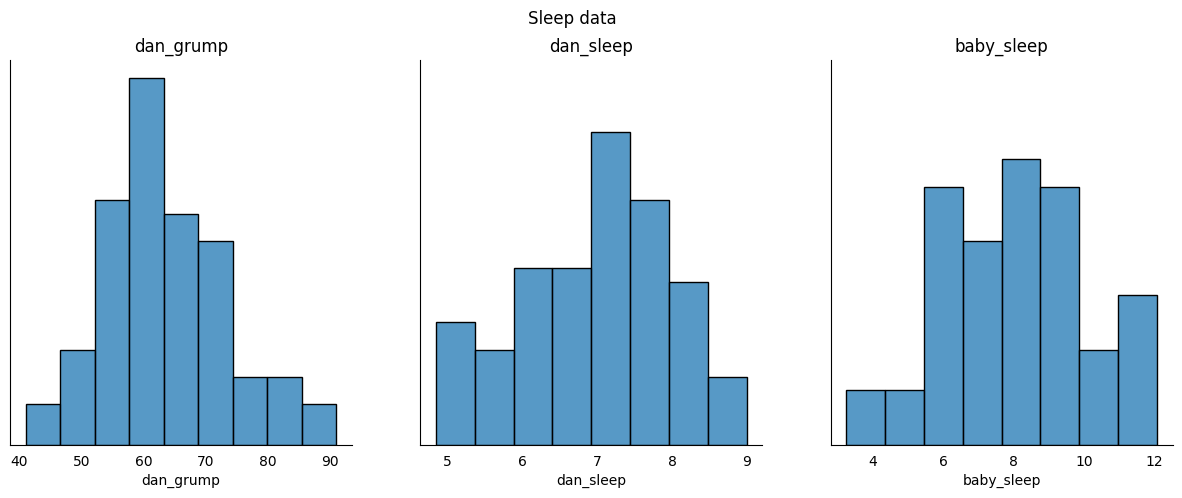

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

ax1 = sns.histplot(data=parenthood.dan_grump, ax=axes[0])
ax2 = sns.histplot(data=parenthood.dan_sleep, ax=axes[1])
ax3 = sns.histplot(data=parenthood.baby_sleep, ax=axes[2])

fig.suptitle("Sleep data")
ax1.set_title("dan_grump")
ax2.set_title("dan_sleep")
ax3.set_title("baby_sleep")

for ax in axes:
    ax.set_yticklabels(labels=[])
    ax.set_ylabel(ylabel=None)
    ax.tick_params(left=False)
    ax.tick_params(bottom=False)

sns.despine()

### Strength and direction

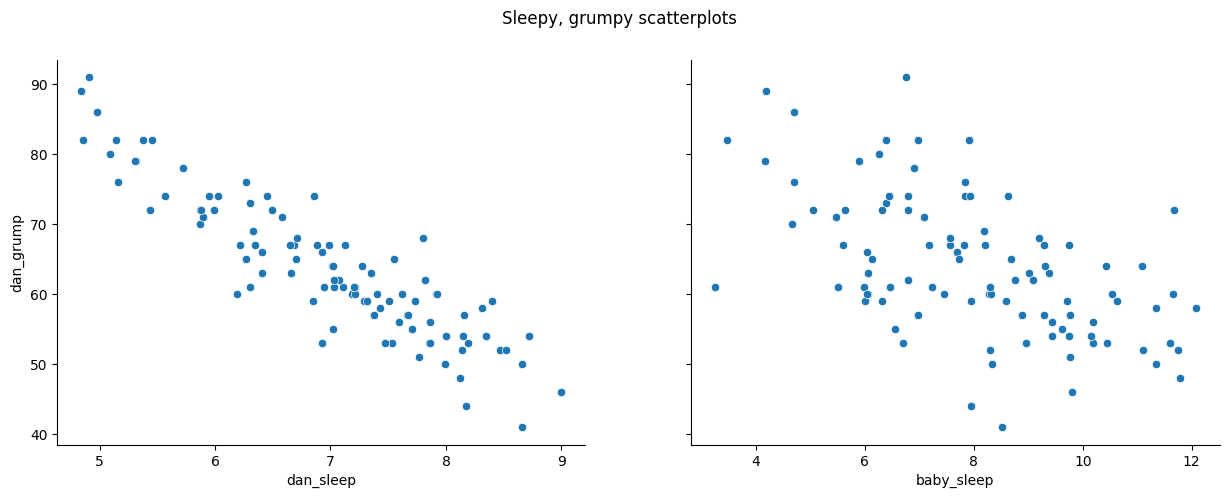

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax1 = sns.scatterplot(data=parenthood, x='dan_sleep', y='dan_grump', ax=axes[0])
ax2 = sns.scatterplot(data=parenthood, x='baby_sleep', y='dan_grump', ax=axes[1])

fig.suptitle("Sleepy, grumpy scatterplots")

sns.despine()

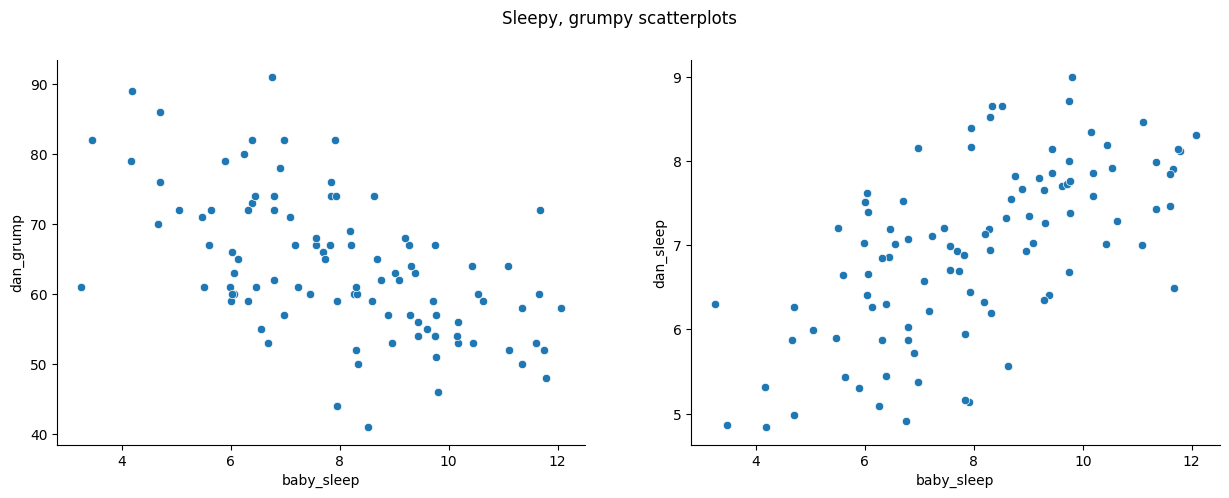

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

ax1 = sns.scatterplot(data=parenthood, x='baby_sleep', y='dan_grump', ax=axes[0])
ax2 = sns.scatterplot(data=parenthood, x='baby_sleep', y='dan_sleep', ax=axes[1])

fig.suptitle("Sleepy, grumpy scatterplots")
sns.despine()


### Pearson correlation coefficient
* Varies from -1 to 1
* r = -1 : perfect negative relationship
* r = 1 : perfect positive relationship

Cov(X, Y) = average cross product between X and Y
* covariance = 0 : X and Y are entirely unrelated
* covariance > 0 : relationship is positive
* covariance < 0 : relationship is negative
* Units of covariance are X x Y (?)

Pearson correlation coefficient standardises the covariance by dividing by the standard deviations.


In [ ]:
x = parenthood.dan_sleep
y = parenthood.dan_grump

x.corr(y)

-0.9033840374657273

In [ ]:
parenthood.corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.627949,-0.903384,-0.098408
baby_sleep,0.627949,1.000000,-0.565964,-0.010434
dan_grump,-0.903384,-0.565964,1.000000,0.076479
day,-0.098408,-0.010434,0.076479,1.000000


A rough guide to interpreting correlation:

In [ ]:
correlation = ["-1.0 to -0.9", "-0.9 to -0.7", "-0.7 to -0.4",
                    "-0.4 to -0.2", "-0.2 to 0", "0 to 0.2 ", "0.2 to 0.4",
                    ".4 to 0.7", "0.7 to 0.9", "0.9 to 1.0"]
strength = ["Very strong", "Strong", "Moderate", "Weak", "Negligible", "Negligible", "Weak",
           "Moderate", "Strong", "Very strong"]
direction = ["Negative"]*5 + ["Positive"]*5
df = pd.DataFrame(
    {'Correlation': correlation,
     'Strength': strength,
     'Direction': direction
    })
df.style.hide(axis='index')


Correlation,Strength,Direction
-1.0 to -0.9,Very strong,Negative
-0.9 to -0.7,Strong,Negative
-0.7 to -0.4,Moderate,Negative
-0.4 to -0.2,Weak,Negative
-0.2 to 0,Negligible,Negative
0 to 0.2,Negligible,Positive
0.2 to 0.4,Weak,Positive
.4 to 0.7,Moderate,Positive
0.7 to 0.9,Strong,Positive
0.9 to 1.0,Very strong,Positive


#### Cons of Pearson correlation coefficient
* Measures the strength of the linear relationship between two variables.
* Shouldn't use when an increase in X is reflected by an increase in Y but the relationship isn't linear.
* Doesn't capture whether there is an ordinal relationship

In [ ]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/effort.csv'

effort = pd.read_csv(file)

effort

,hours,grade
0,2,13
1,76,91
2,40,79
3,6,14
4,16,21
5,28,74
6,27,47
7,59,85
8,46,84
9,68,88


In [ ]:
effort['hours'].corr(effort['grade']) # strong relationship between hours worked and grade received

0.9094019658612525

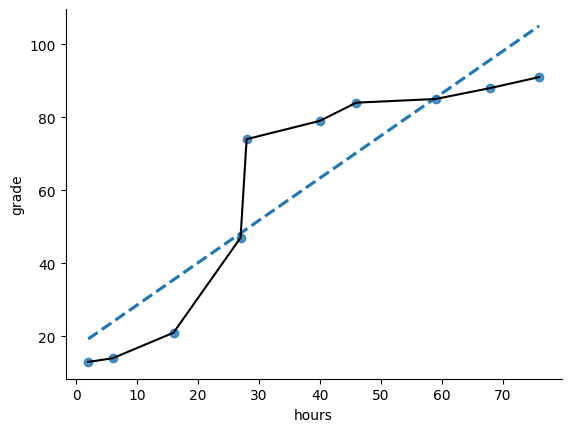

In [ ]:
fig, ax = plt.subplots()
sns.regplot(x='hours', y='grade', data=effort, ci=None, ax=ax)
sns.lineplot(x='hours', y='grade', data=effort, color='black', errorbar=None, ax=ax)
ax.lines[0].set_linestyle("--")
sns.despine()
# increasing hours worked doesn't always increase the grade

### Spearman's rank order correlation
* Calculate Pearson correlation on ranks of data.

In [ ]:
effort['hours'].corr(effort['grade'], method='spearman')

0.9999999999999999

## Missing values

### The single variable case

In [ ]:
partial = [10, 20, float('nan'), 30]

# calculate nan-friendly versions using np.nan versions
print("np.nan versions")
print(np.nanmean(partial))
print(np.nanmedian(partial))
print(np.nanstd(partial)) # divides by N
print(np.nanstd(partial, ddof=1)) # divides by N-1

# calculate nan-friendly stats by default using pandas
df = pd.DataFrame(
    {'var1': partial,
     'var2': [10, float('nan'), float('nan'), 35],
     'var3': [float('nan'), 12, 18, 27]
    }
)
print("pandas versions")
print(df['var1'].mean())
print(df['var1'].median())
print(df['var1'].std()) # divides by N-1


np.nan versions
20.0
20.0
8.16496580927726
10.0
pandas versions
20.0
20.0
10.0


### Pairwise calculations

In [ ]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood2.csv'

parenthood_nan = pd.read_csv(file)
parenthood_nan.describe()

,dan_sleep,baby_sleep,dan_grump,day
count,91.000000,89.000000,92.000000,100.000000
mean,6.976923,8.114494,63.152174,50.500000
std,1.020409,2.046821,9.851574,29.011492
min,4.840000,3.250000,41.000000,1.000000
25%,6.285000,6.460000,56.000000,25.750000
50%,7.030000,8.200000,61.000000,50.500000
75%,7.785000,9.610000,70.250000,75.250000
max,9.000000,12.070000,89.000000,100.000000


In [ ]:
"""
* only looks at the pair of variables it's trying to correlate when dropping
* keeps more observations, improving reliability of estimated correlation
* every correlation is computed from a different set of observations -> difficult to compare
* use if nans are random
"""
print("Pairwise method")
parenthood_nan.corr()

Pairwise method


,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.614723,-0.903442,-0.076797
baby_sleep,0.614723,1.000000,-0.567803,0.058309
dan_grump,-0.903442,-0.567803,1.000000,0.005833
day,-0.076797,0.058309,0.005833,1.000000


In [ ]:
"""
* drops all rows that contain a nan
* use if nans indicate bad data
"""
print("Only keep complete observations")
parenthood_nan.dropna().corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.639498,-0.899515,0.061329
baby_sleep,0.639498,1.000000,-0.586561,0.145558
dan_grump,-0.899515,-0.586561,1.000000,-0.068166
day,0.061329,0.145558,-0.068166,1.000000


# 3.6 Graphs

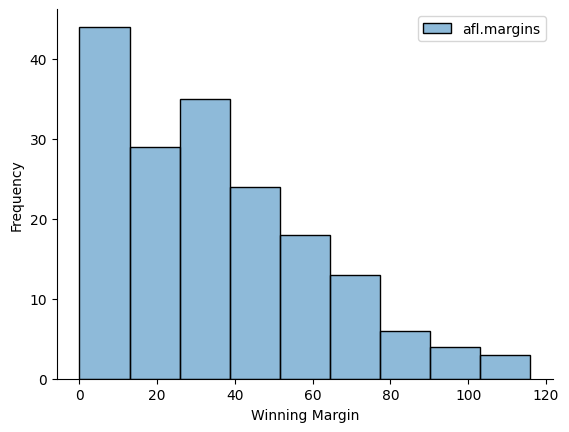

In [ ]:
ax = sns.histplot(afl_margins)
ax.set(xlabel = "Winning Margin",
       ylabel = "Frequency")
sns.despine()